In [2]:
#cnn
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

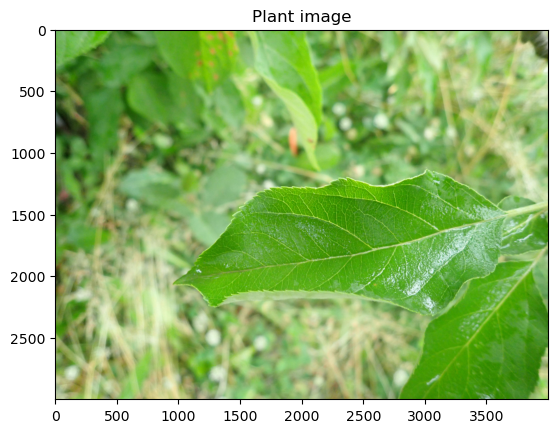

In [3]:
from matplotlib import image as img
from matplotlib import pyplot as plt
plt.title("Plant image")
image = img.imread("plant dataset/Train/Train/Healthy/800edef467d27c15.jpg")
plt.imshow(image)
plt.show()

In [4]:
import os


def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files


train_files_healthy = "plant dataset/Train/Train/Healthy"
train_files_powdery = "plant dataset/Train/Train/Powdery"
train_files_rust = "plant dataset/Train/Train/Rust"

test_files_healthy = "plant dataset/Test/Test/Healthy"
test_files_powdery = "plant dataset/Test/Test/Powdery"
test_files_rust = "plant dataset/Test/Test/Rust"

valid_files_healthy = "plant dataset/Validation/Validation/Healthy"
valid_files_powdery = "plant dataset/Validation/Validation/Powdery"
valid_files_rust = "plant dataset/Validation/Validation/Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


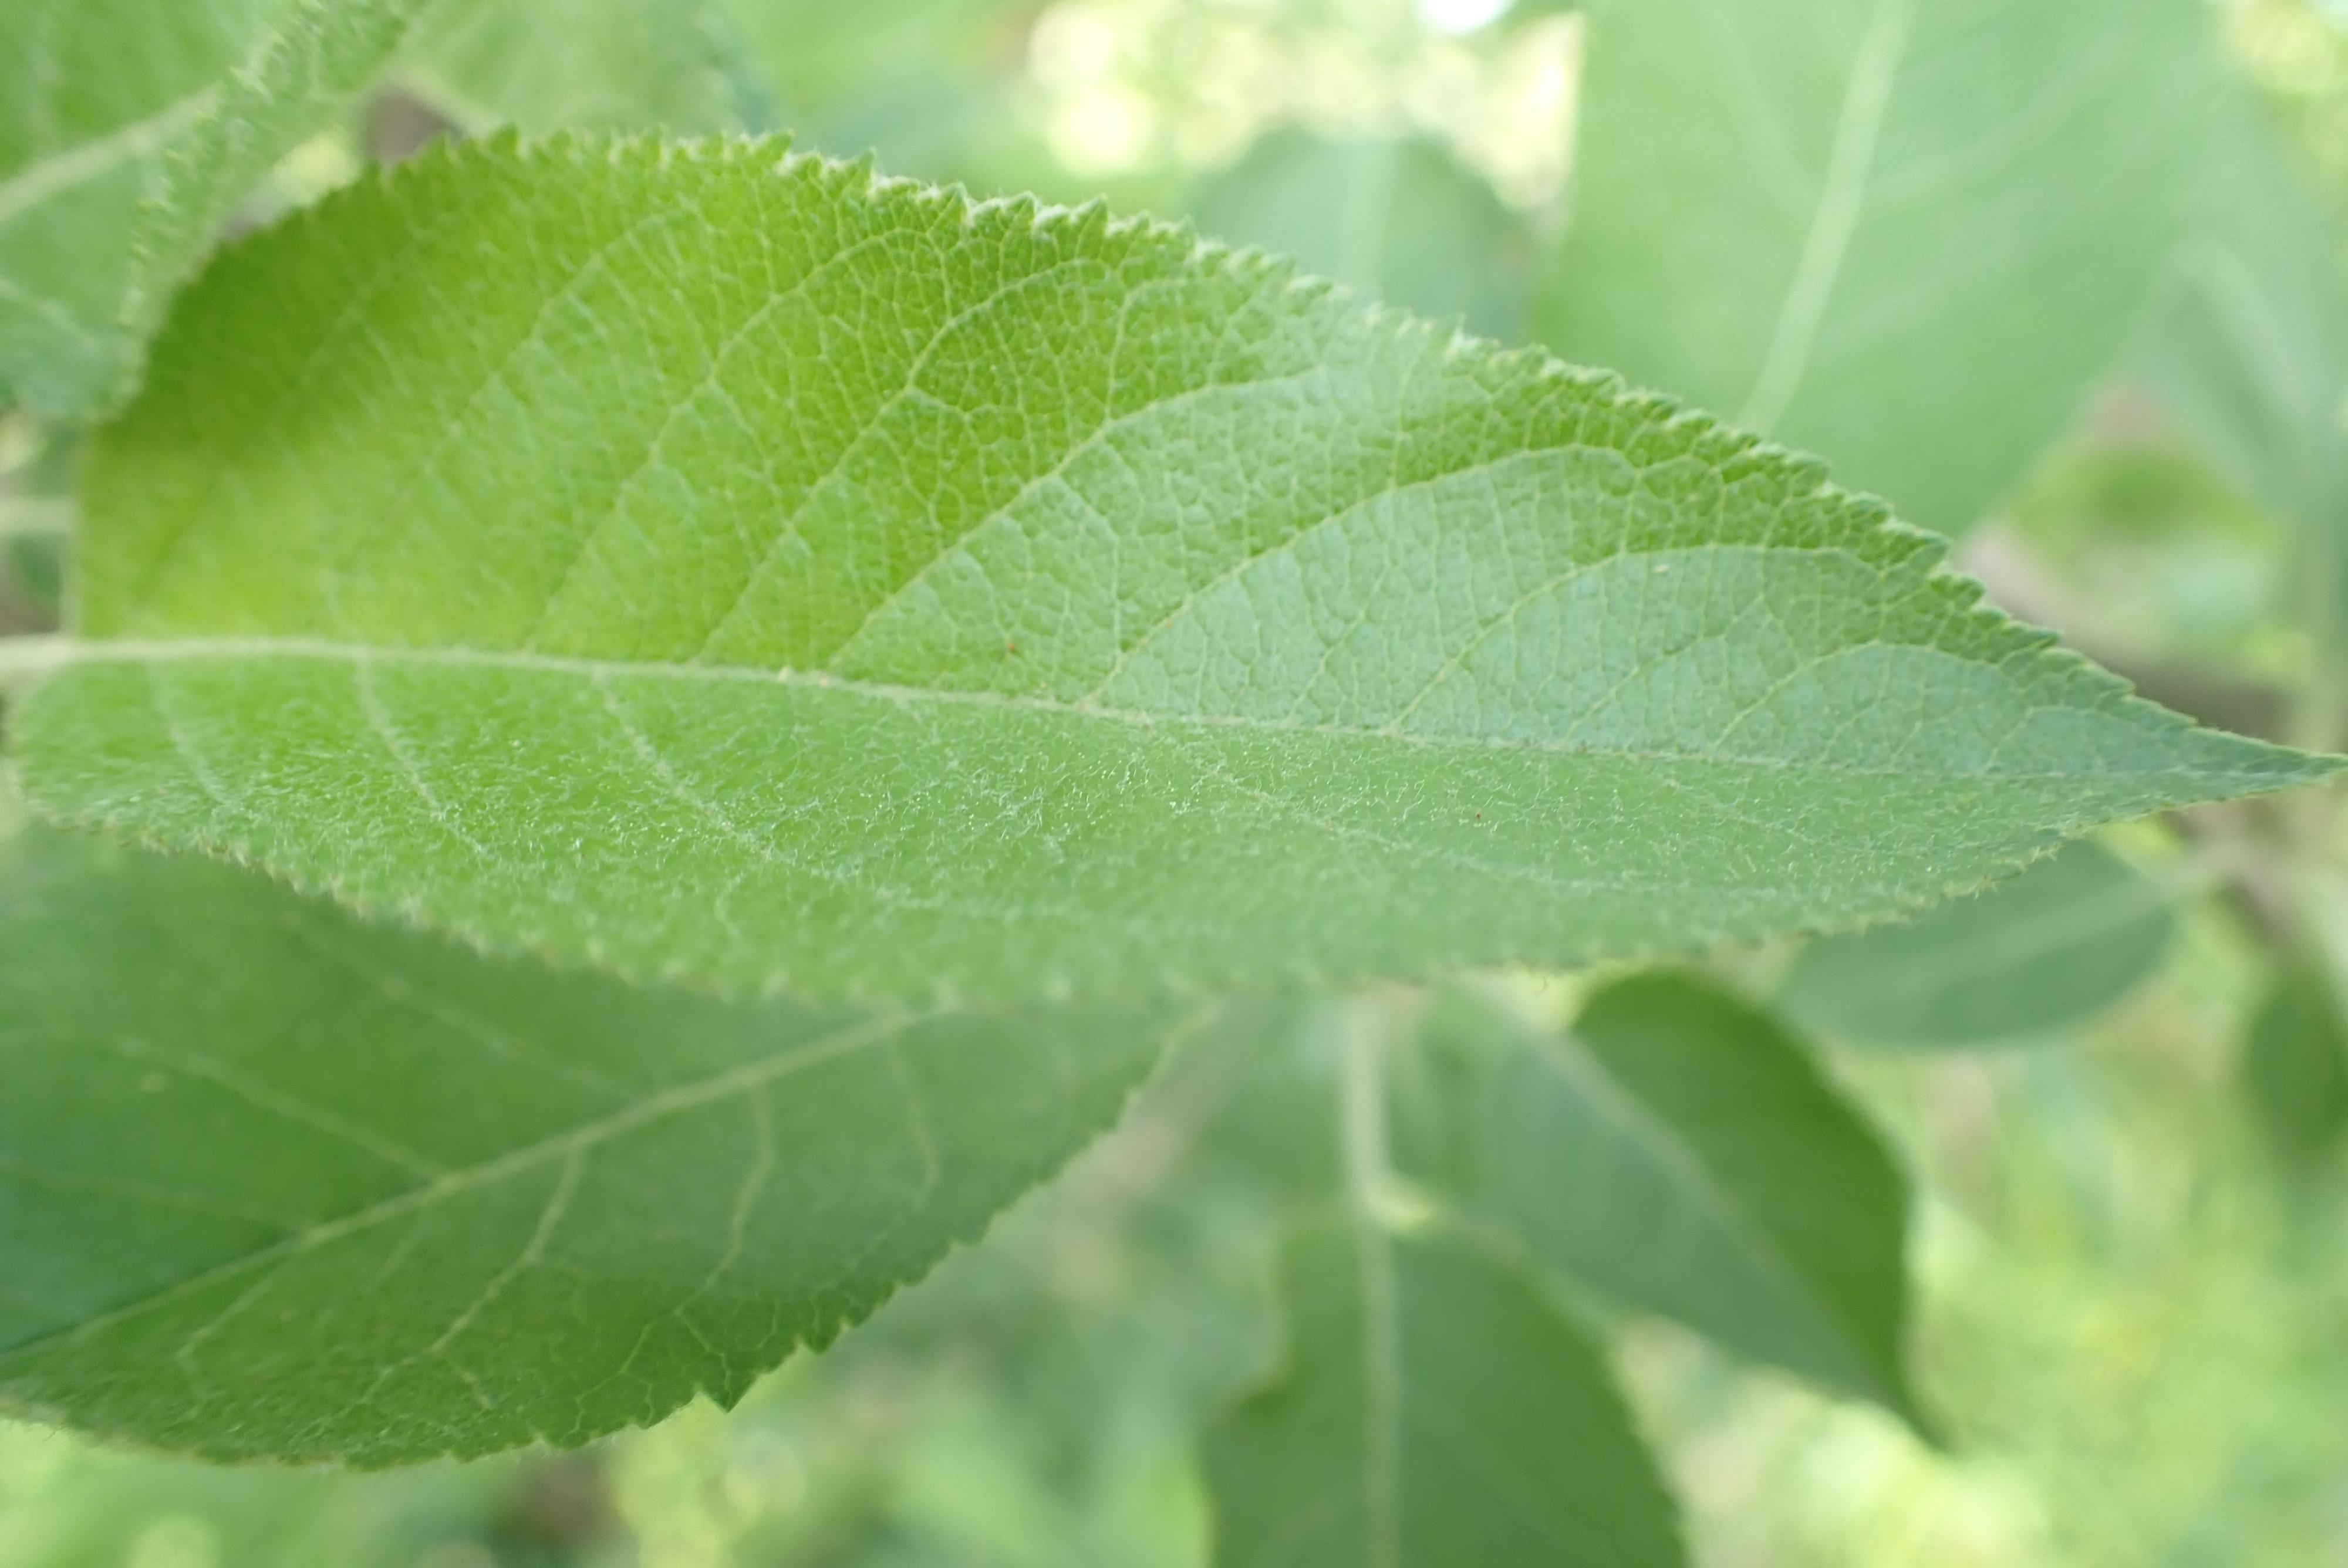

In [5]:
from PIL import Image
import IPython.display as display

image_path = 'plant dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

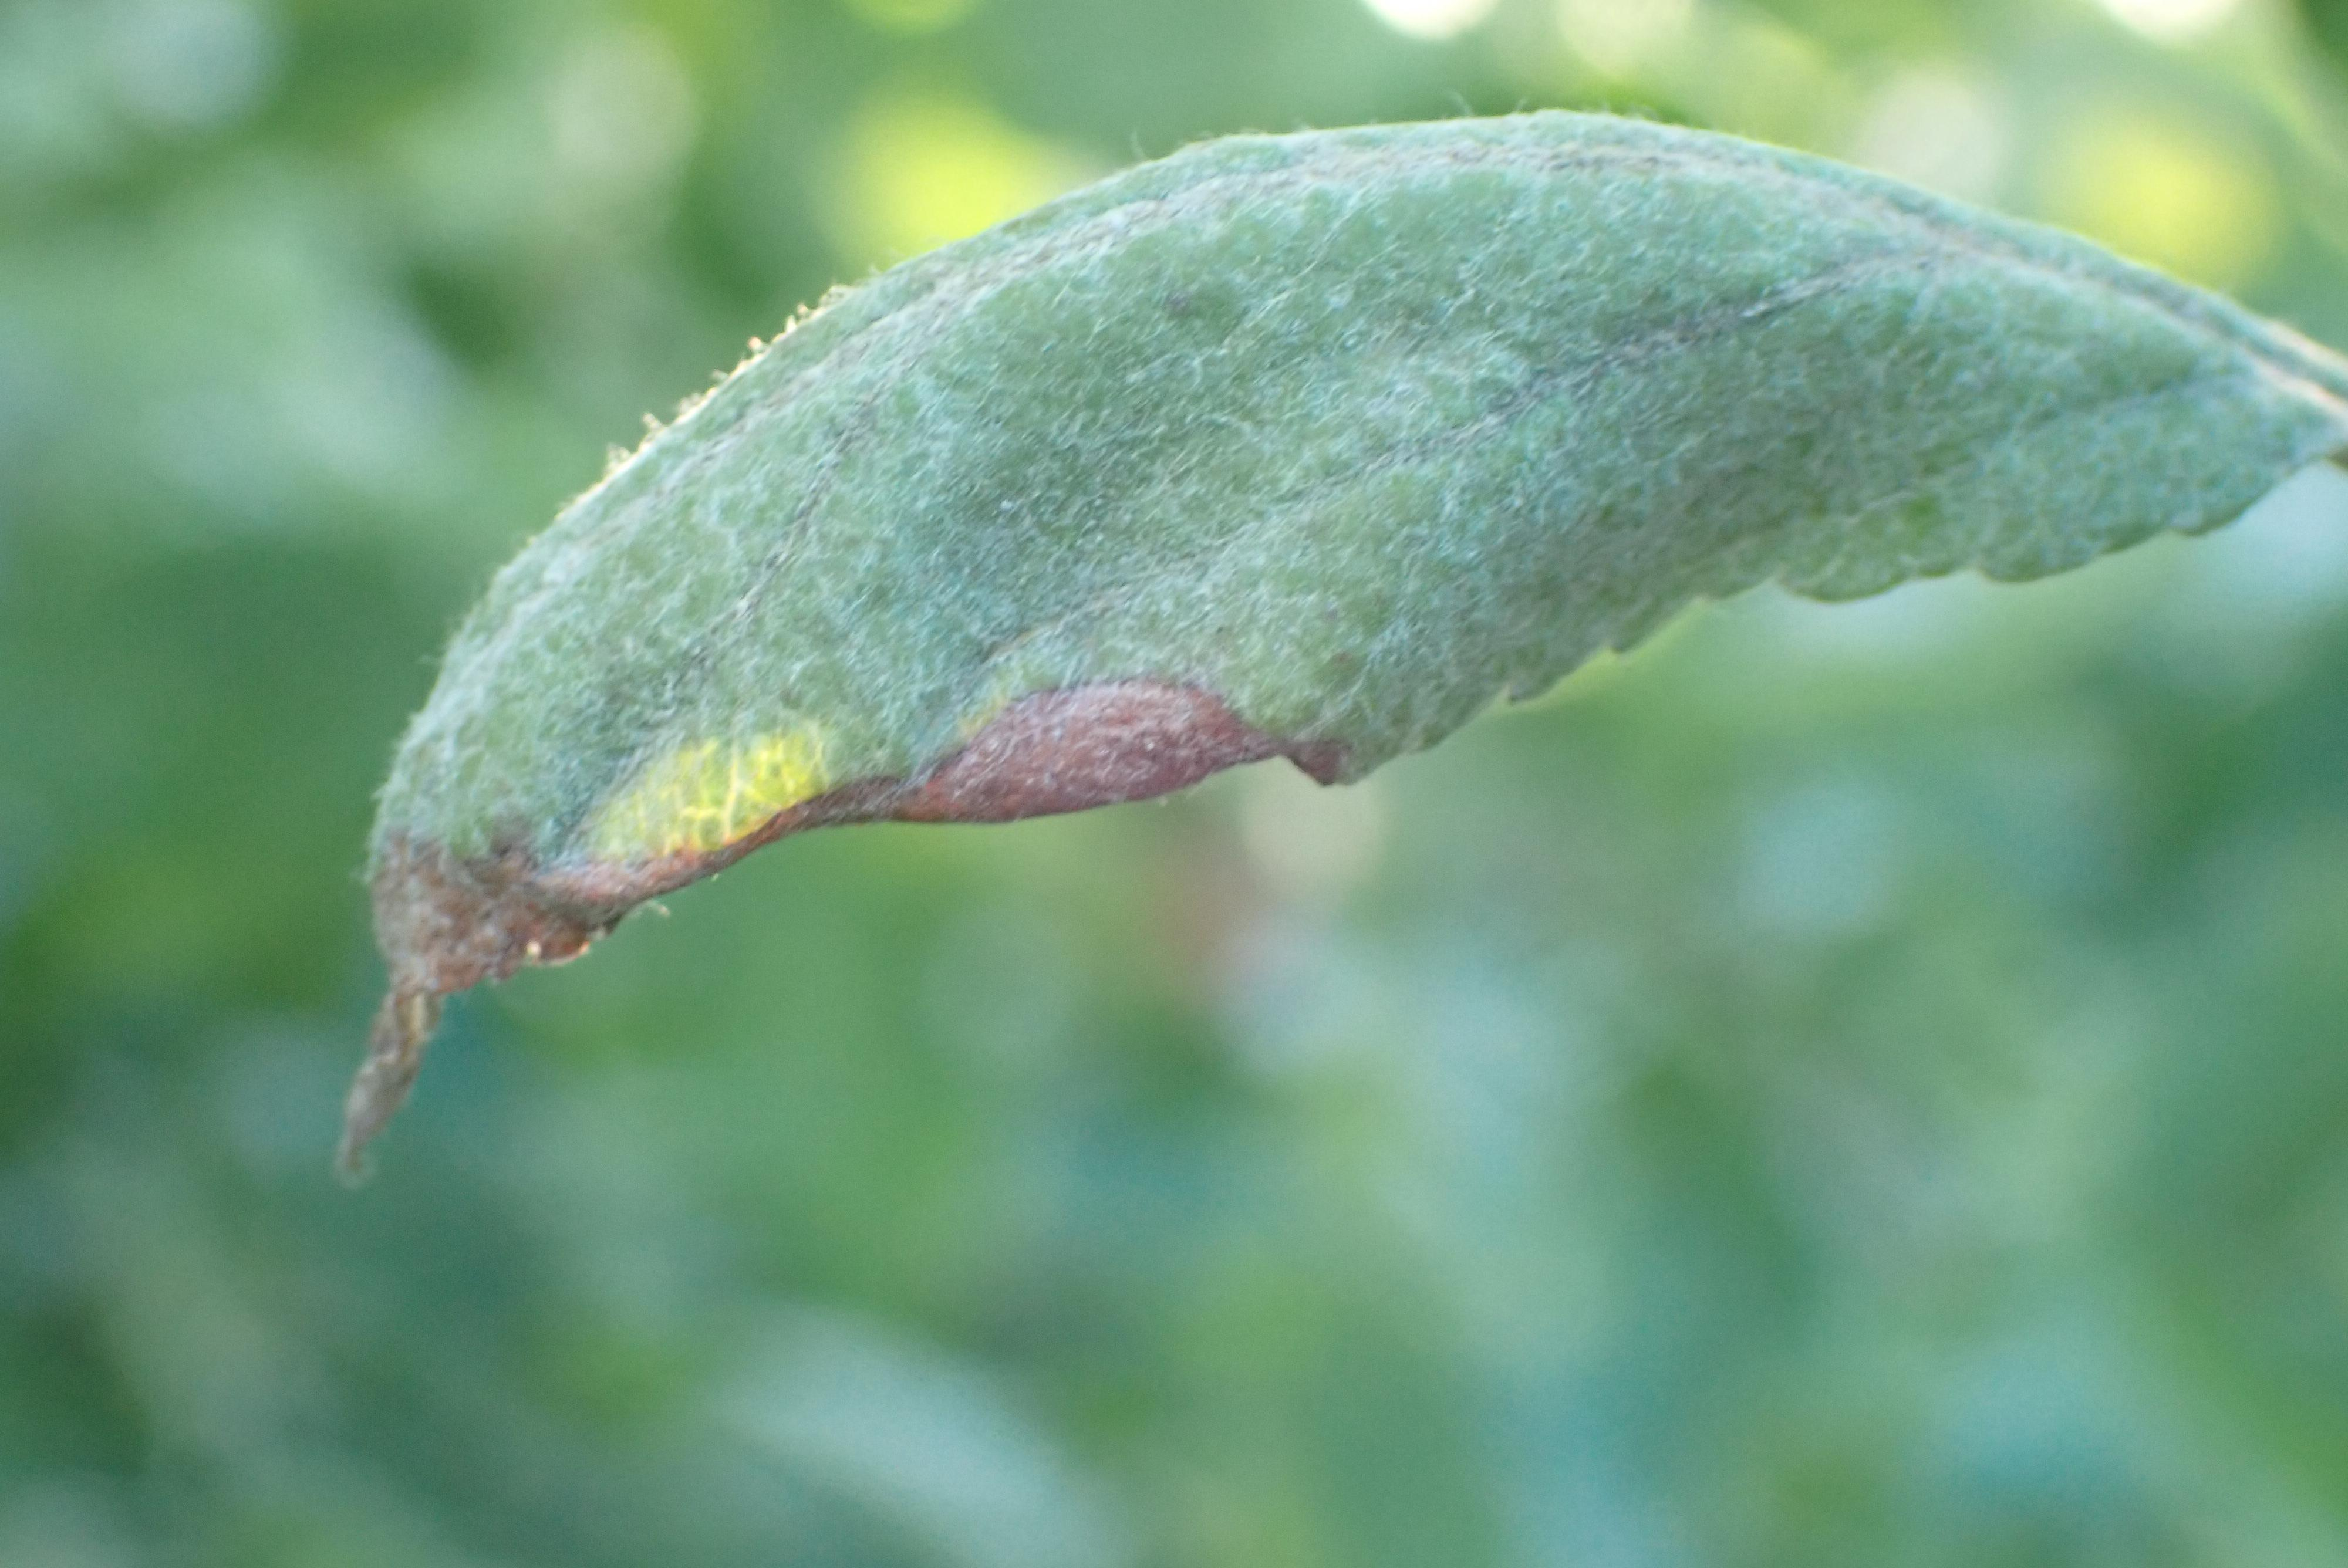

In [15]:
image_path = 'plant dataset/Test/Test/Powdery/81ecbe9194a32b73.jpg'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_datagen.flow_from_directory('plant dataset/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('plant dataset/Test/Test',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [14]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5


42/42 [==============================] - 1145s 28s/step - loss: 2.0634 - accuracy: 0.3578 - val_loss: 1.0159 - val_accuracy: 0.4400
Epoch 2/5
42/42 [==============================] - 756s 18s/step - loss: 0.9360 - accuracy: 0.5098 - val_loss: 0.8968 - val_accuracy: 0.5467
Epoch 3/5
42/42 [==============================] - 462s 11s/step - loss: 0.7344 - accuracy: 0.6762 - val_loss: 0.6716 - val_accuracy: 0.7200
Epoch 4/5
42/42 [==============================] - 402s 10s/step - loss: 0.5349 - accuracy: 0.7753 - val_loss: 0.7359 - val_accuracy: 0.7200
Epoch 5/5
42/42 [==============================] - 402s 10s/step - loss: 0.3770 - accuracy: 0.8540 - val_loss: 0.4656 - val_accuracy: 0.8333


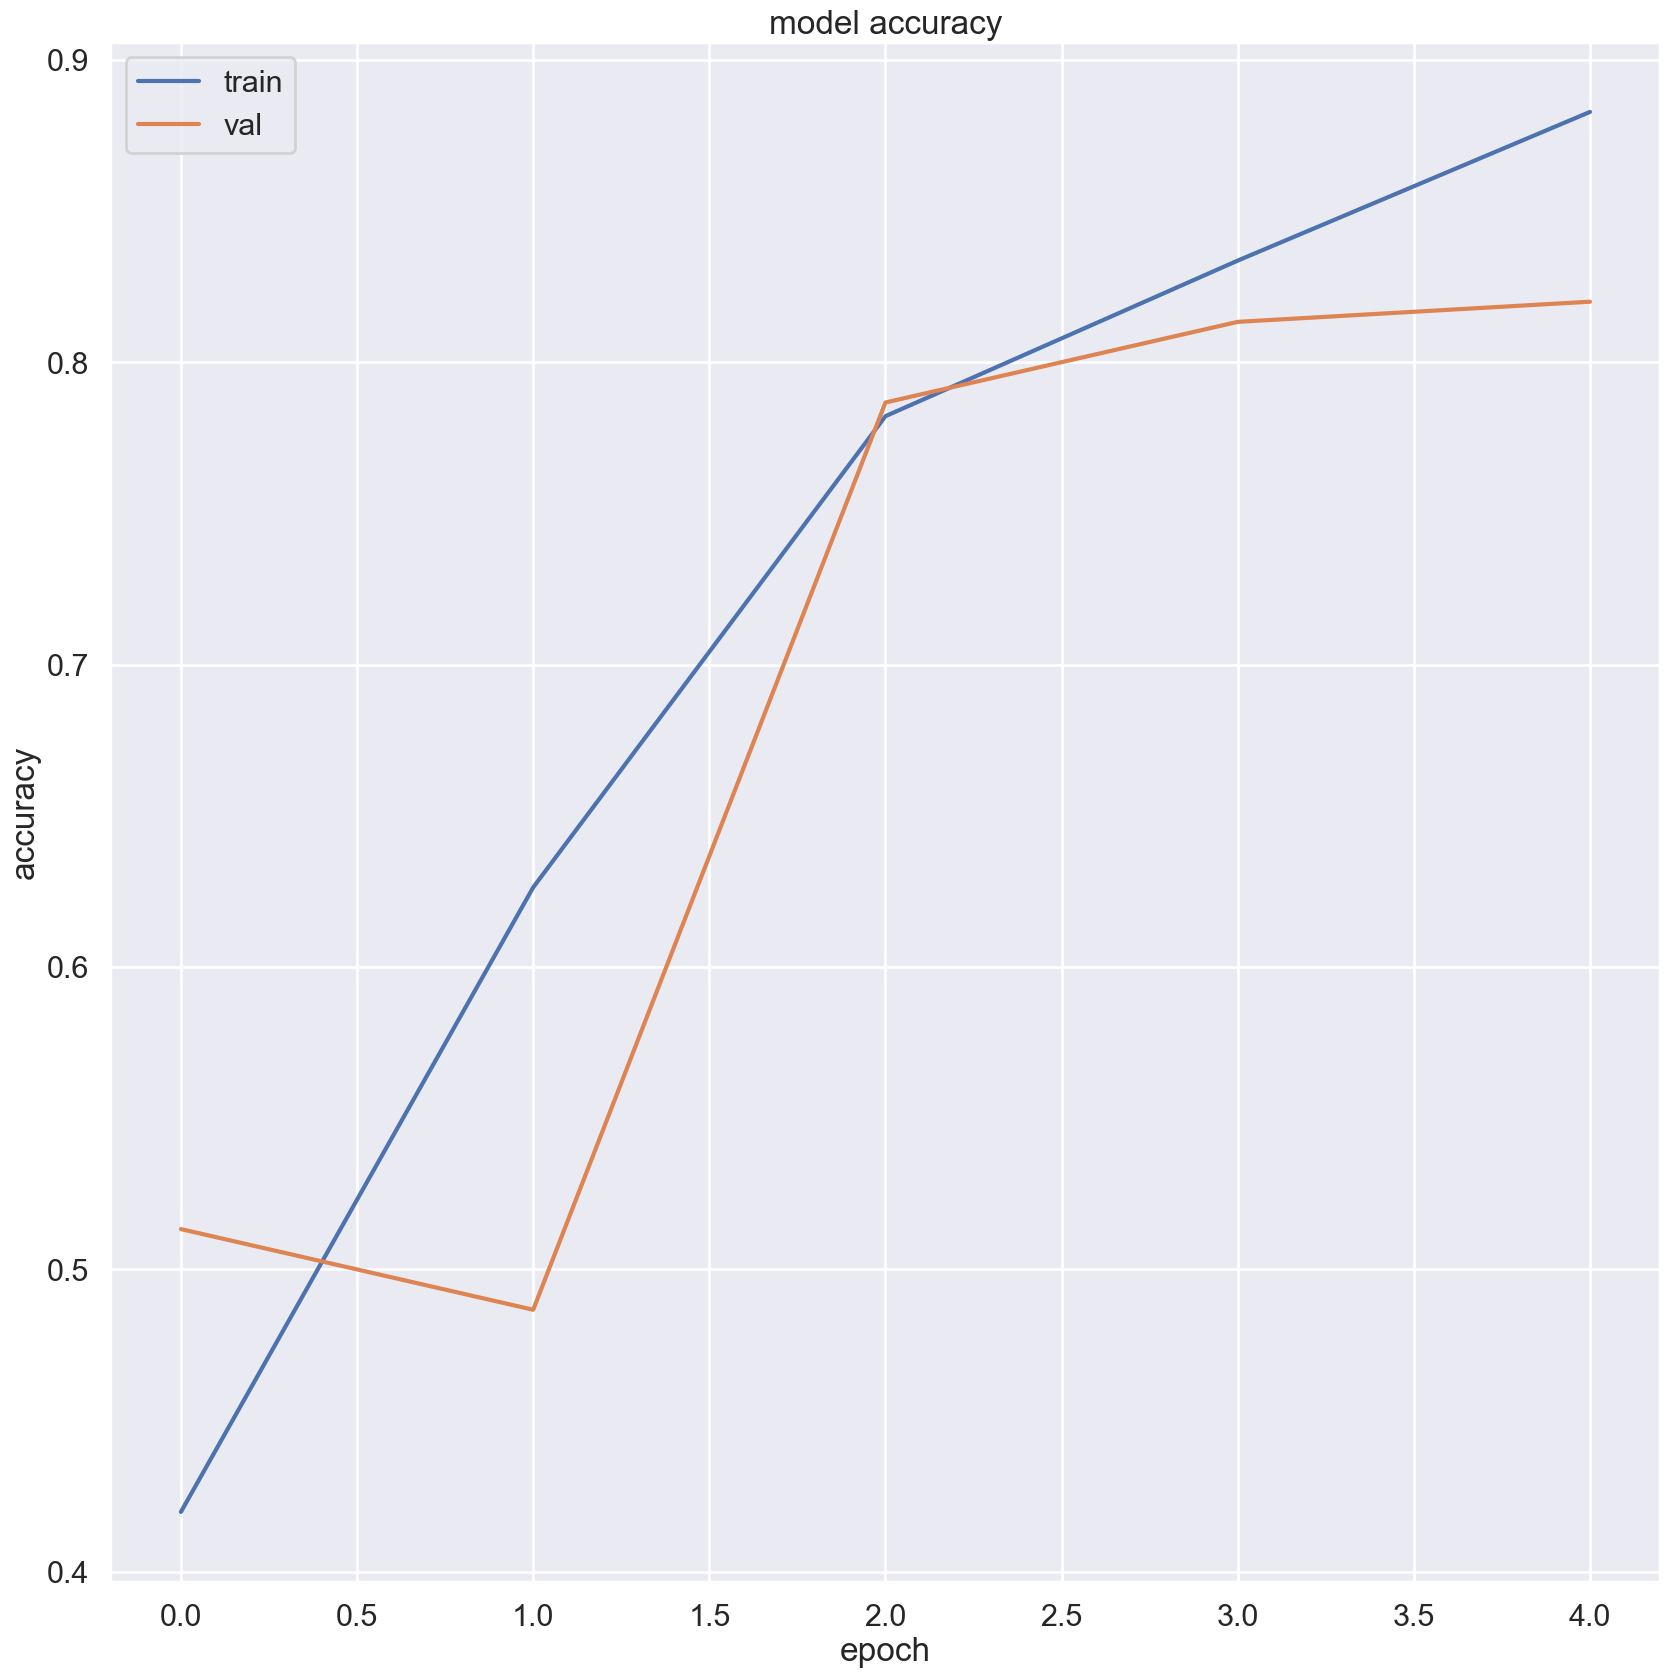

In [15]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

sns.set_theme()
sns.set_context("poster")

figure(figsize=(20, 20), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

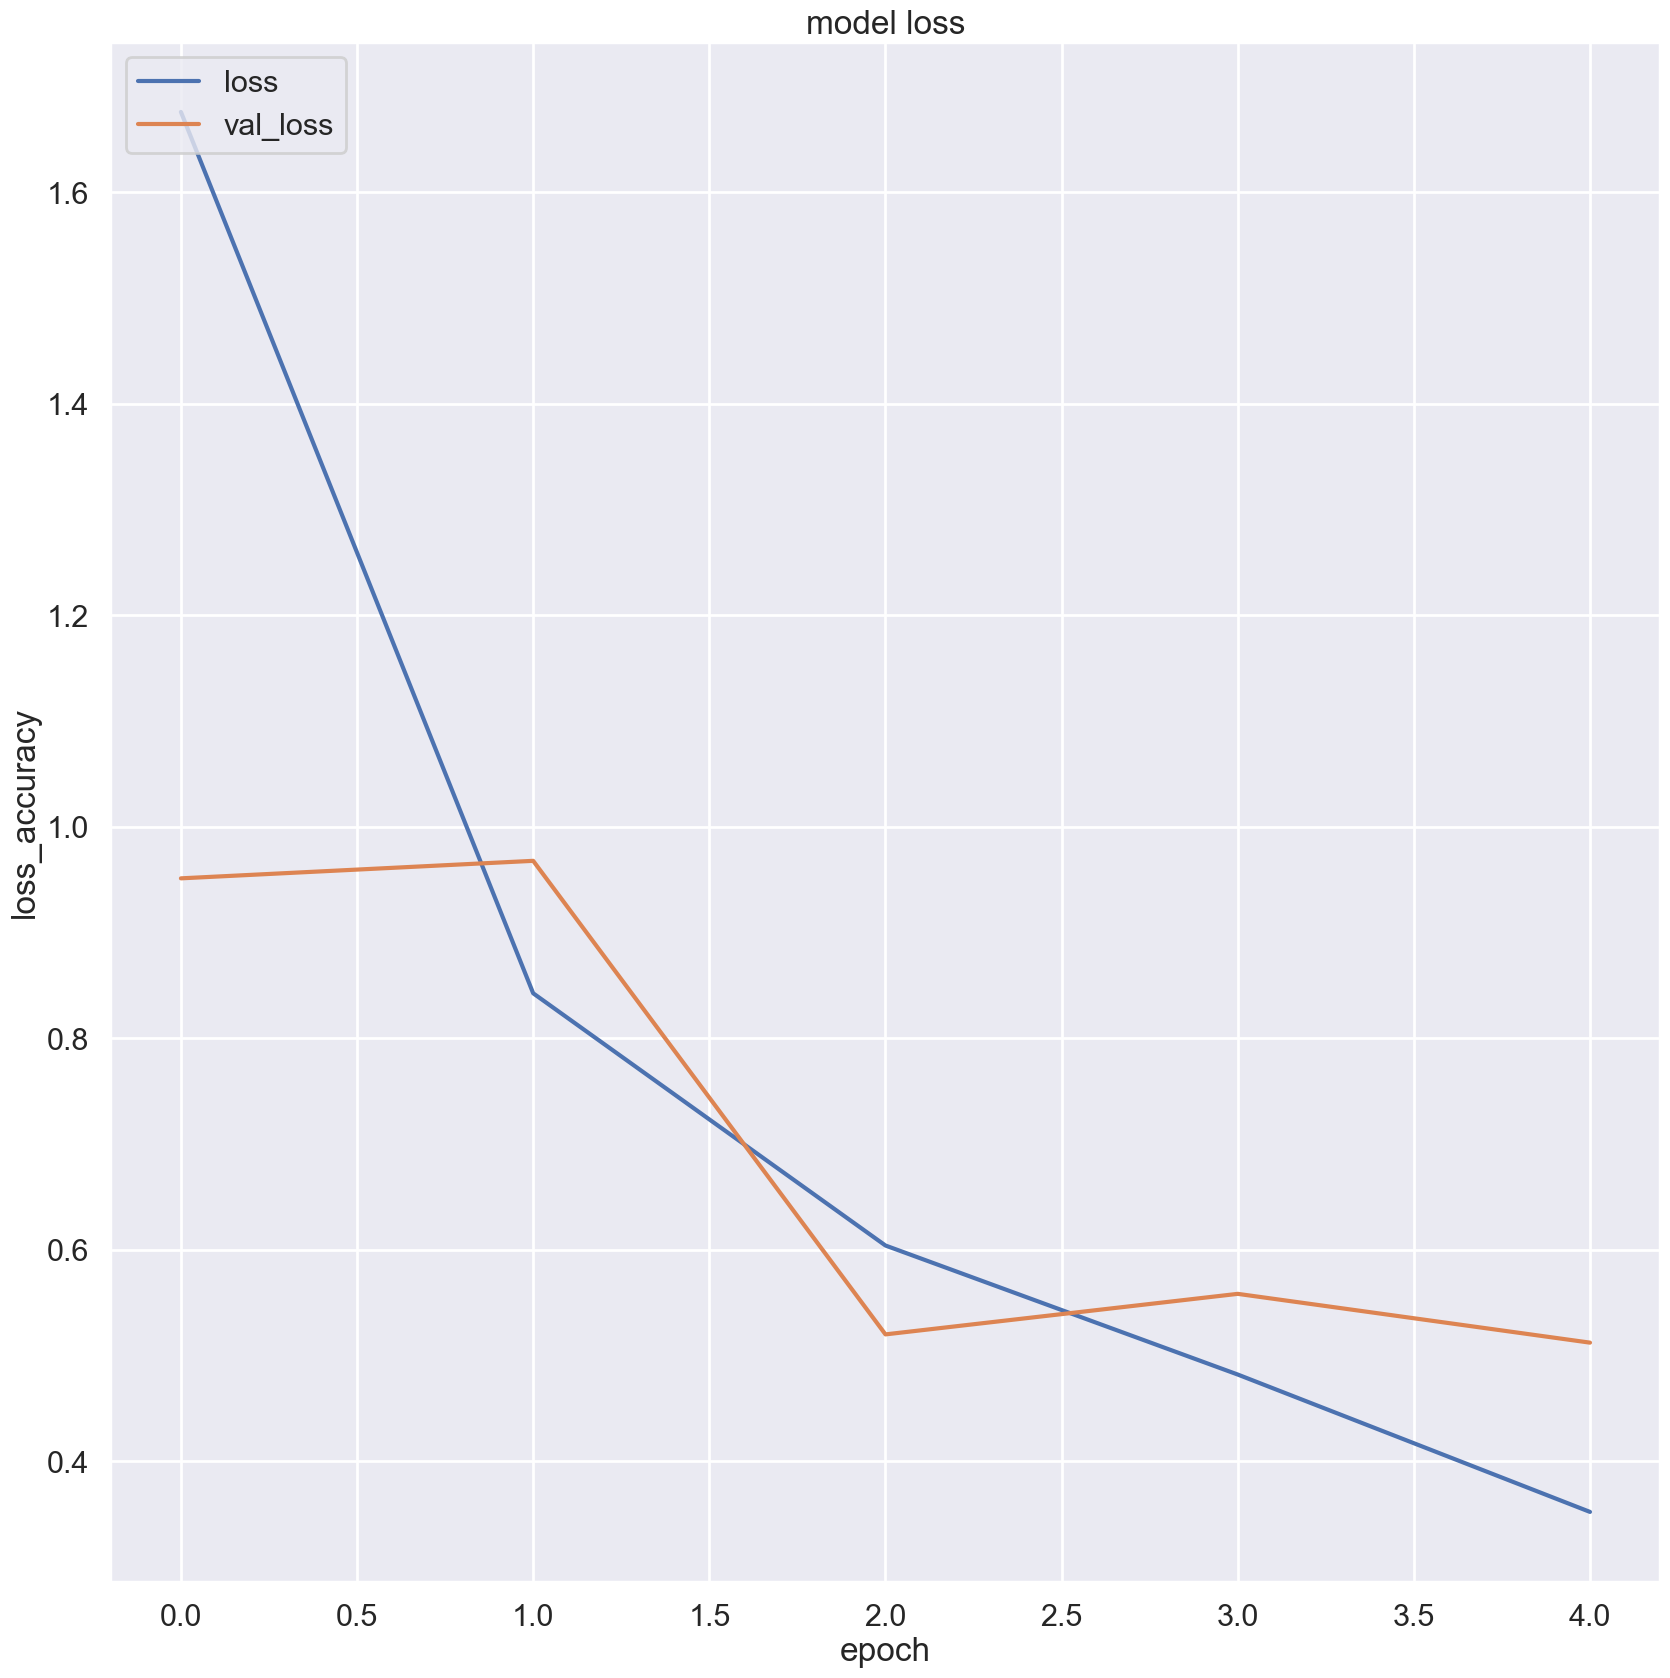

In [16]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

sns.set_theme()
sns.set_context("poster")

figure(figsize=(20, 20), dpi=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss_accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [17]:
model.save("cnn_model.h5")

C:\Users\Rahul Singh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


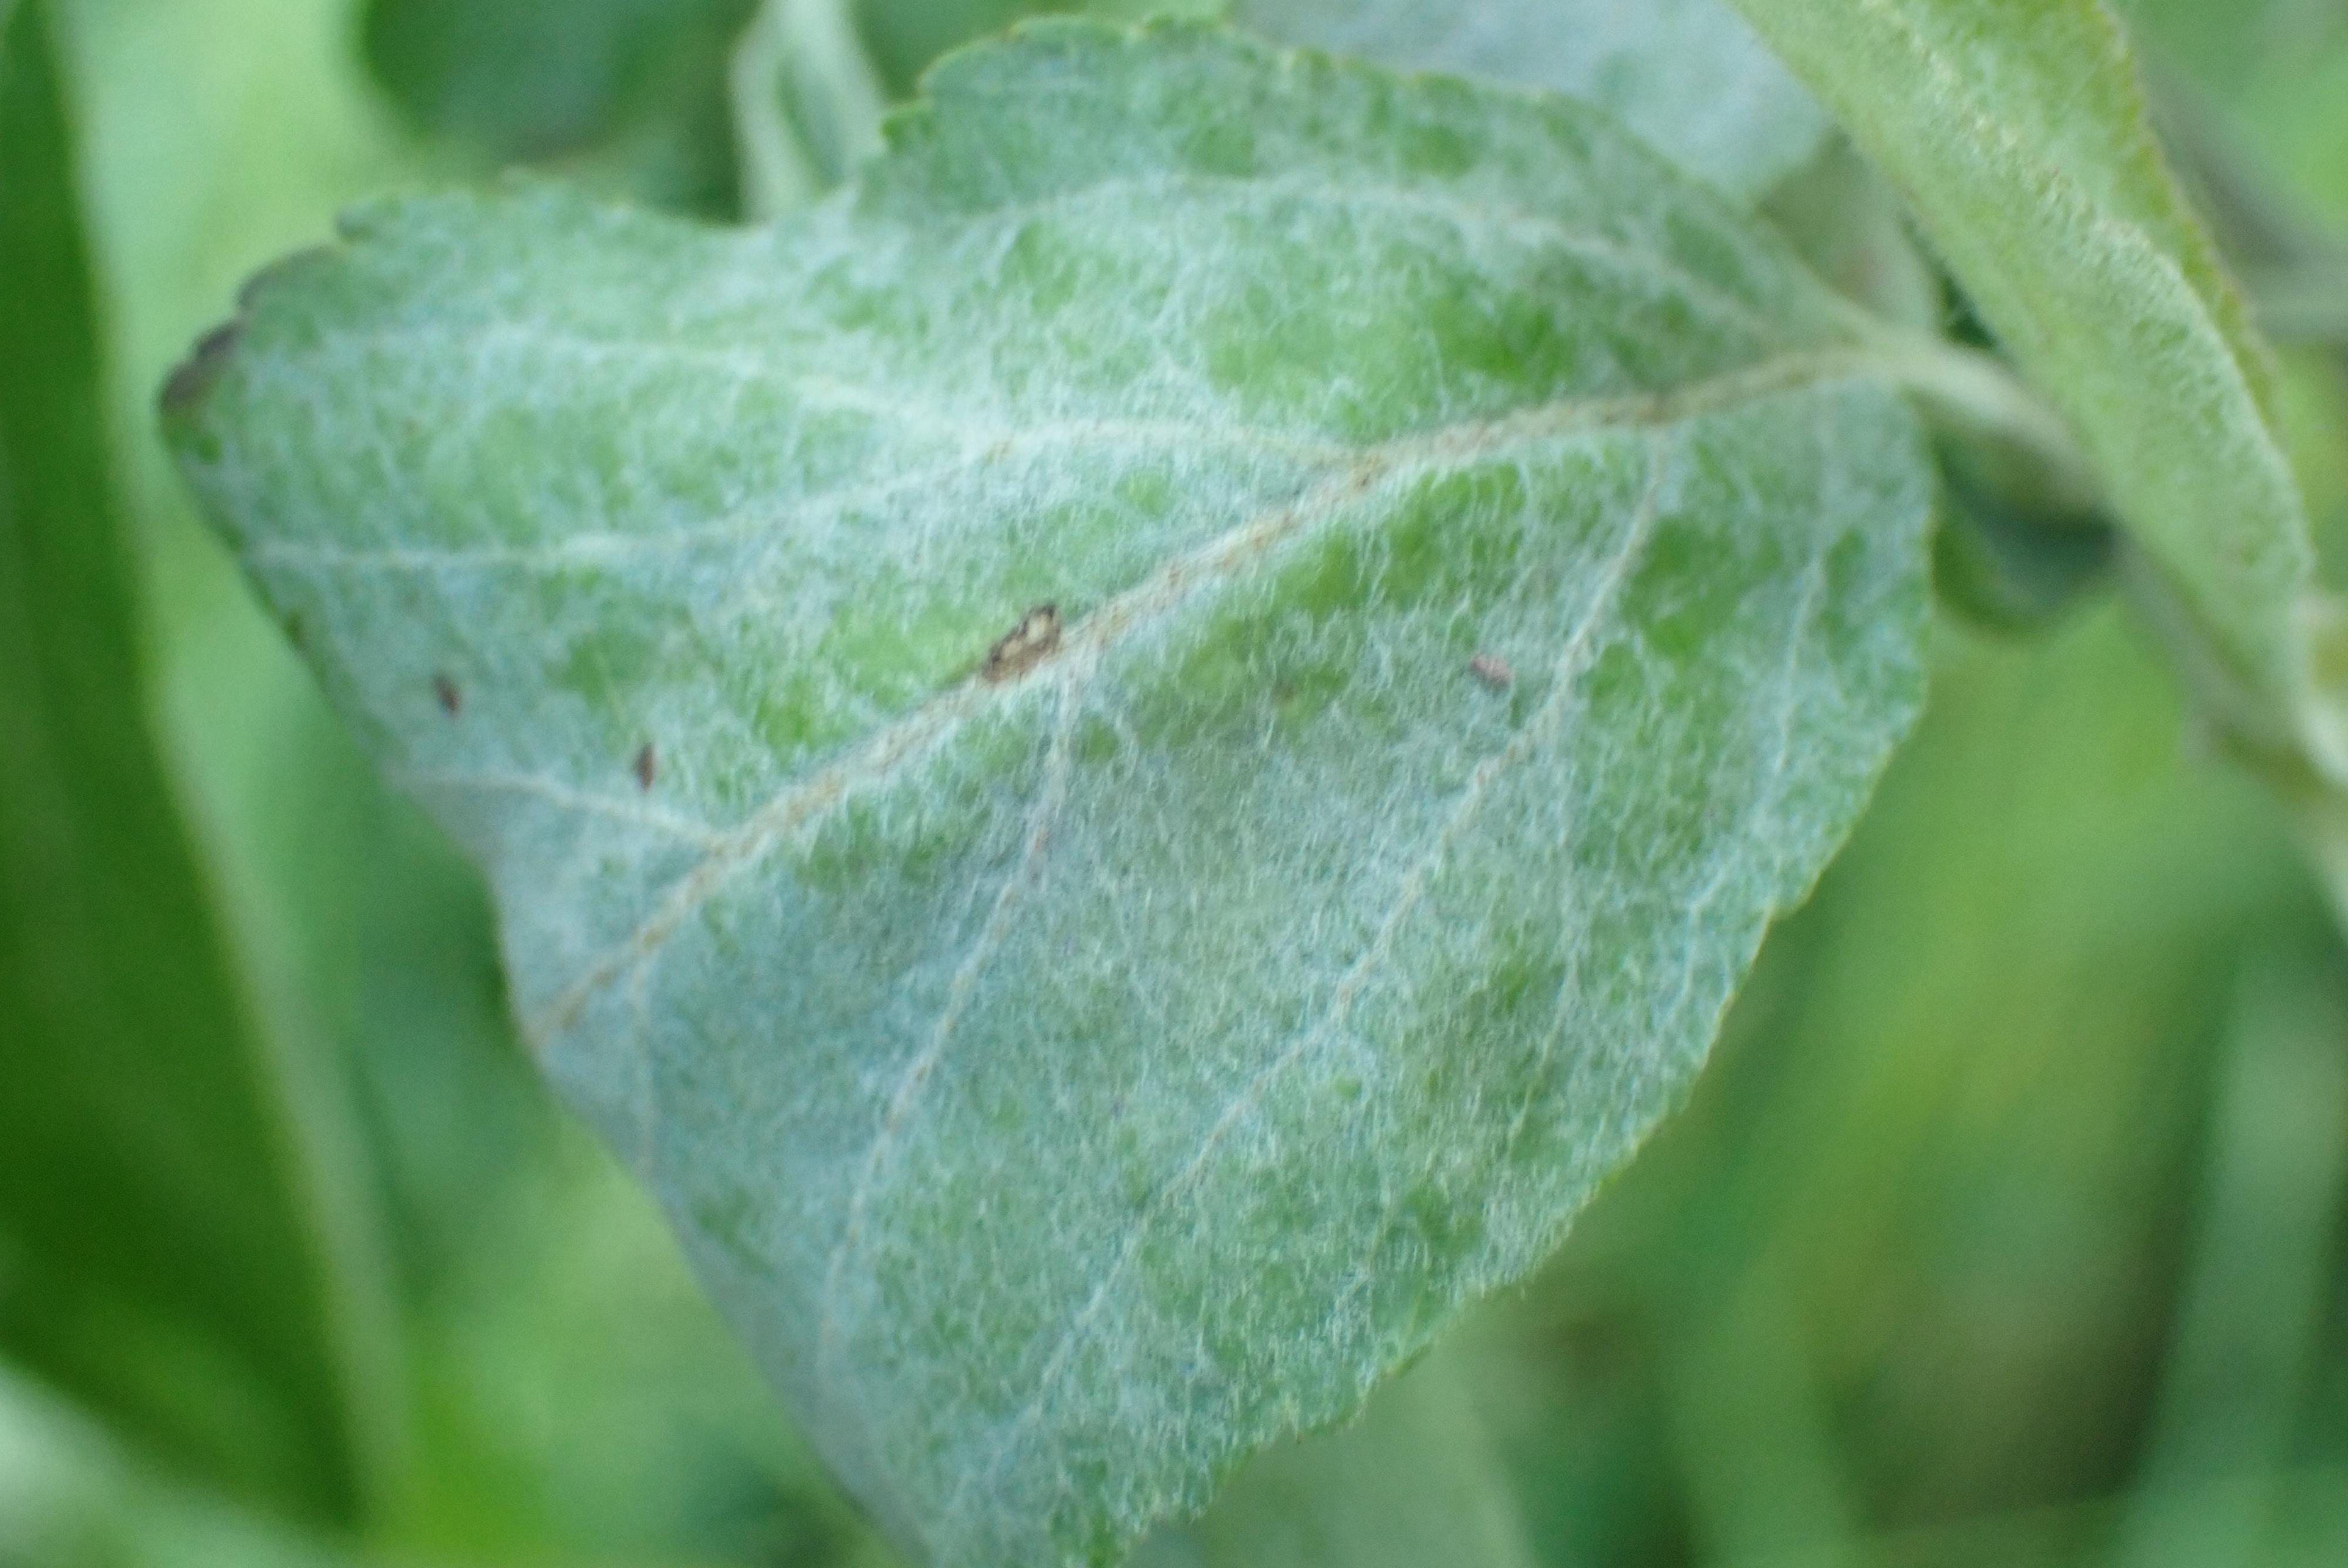

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x


x = preprocess_image('plant dataset/Test/Test/Powdery/80bc7d353e163e85.jpg')
image_path  = 'plant dataset/Test/Test/Powdery/80bc7d353e163e85.jpg'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [19]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 453ms/step


array([0.17331299, 0.8234784 , 0.00320865], dtype=float32)

In [20]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
print(labels)

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}


In [21]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)


Powdery


In [22]:
from sklearn.metrics import confusion_matrix

# Predict classes for the validation set
validation_generator.reset()
predictions = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
y_pred = np.argmax(predictions, axis=1)

# Get true labels
true_labels = []
for i in range(len(validation_generator)):
    _, labels_batch = validation_generator[i]
    true_labels.extend(np.argmax(labels_batch, axis=1))

true_labels = np.array(true_labels)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Extract TP, TN, FP, FN
TP = np.diag(conf_matrix)
TN = np.sum(conf_matrix) - np.sum(conf_matrix, axis=1) - np.sum(conf_matrix, axis=0) + TP
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print TP, TN, FP, FN
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

5/5 [==============================] - 21s 4s/step
Confusion Matrix:
[[27 10 13]
 [28 10 12]
 [20 22  8]]
True Positives: [27 10  8]
True Negatives: [52 68 75]
False Positives: [48 32 25]
False Negatives: [23 40 42]


In [23]:

# Calculate total observations
total_obs = np.sum(conf_matrix)

# Calculate correctly predicted observations
correct_obs = np.sum(TP)

# Calculate accuracy
accuracy = correct_obs / total_obs

print("Accuracy:", accuracy)



Accuracy: 0.3


In [24]:
#precision

# Calculate precision for each class
precision = TP / (TP + FP)

# Print precision for each class
print("Precision for each class:")
for i, prec in enumerate(precision):
    print(f"Class {i}: {prec}")

Precision for each class:
Class 0: 0.36
Class 1: 0.23809523809523808
Class 2: 0.24242424242424243


In [25]:
#recall

# Calculate recall for each class
recall = TP / (TP + FN)

# Print recall for each class
print("Recall for each class:")
for i, rec in enumerate(recall):
    print(f"Class {i}: {rec}")

Recall for each class:
Class 0: 0.54
Class 1: 0.2
Class 2: 0.16


In [26]:
#F1

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print F1-score for each class
print("F1-score for each class:")
for i, f1 in enumerate(f1_score):
    print(f"Class {i}: {f1}")

F1-score for each class:
Class 0: 0.43200000000000005
Class 1: 0.21739130434782608
Class 2: 0.19277108433734938


In [27]:
#AUC-ROC

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))

# Calculate AUC-ROC for each class
auc_roc = []
for i in range(true_labels_bin.shape[1]):
    auc_roc.append(roc_auc_score(true_labels_bin[:, i], predictions[:, i]))

# Average AUC-ROC across all classes
average_auc_roc = np.mean(auc_roc)

# Print AUC-ROC for each class and average AUC-ROC
print("AUC-ROC for each class:")
for i, auc in enumerate(auc_roc):
    print(f"Class {i}: {auc}")

print("Average AUC-ROC:", average_auc_roc)

AUC-ROC for each class:
Class 0: 0.5206
Class 1: 0.431
Class 2: 0.4968999999999999
Average AUC-ROC: 0.4828333333333333


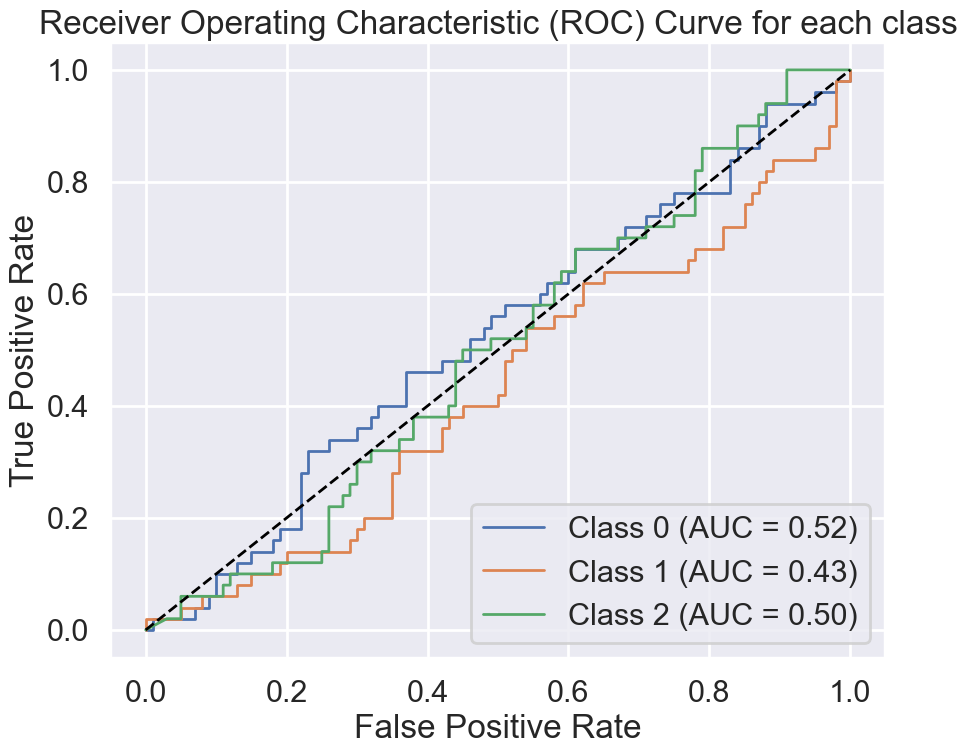

Average AUC-ROC: 0.4828333333333333


In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))

# Calculate AUC-ROC for each class
auc_roc = []
for i in range(true_labels_bin.shape[1]):
    auc_roc.append(roc_auc_score(true_labels_bin[:, i], predictions[:, i]))

# Plot AUC-ROC for each class
plt.figure(figsize=(10, 8))
for i in range(true_labels_bin.shape[1]):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {auc_roc[i]:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

# Average AUC-ROC across all classes
average_auc_roc = np.mean(auc_roc)
print("Average AUC-ROC:", average_auc_roc)

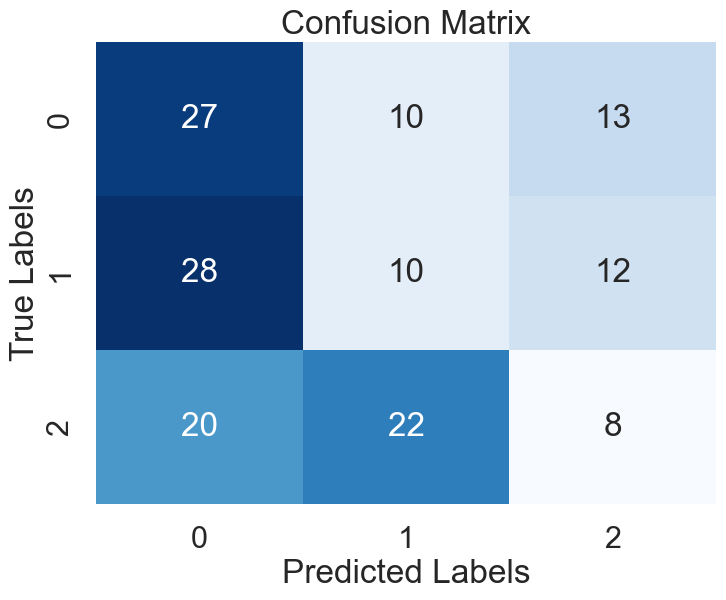

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [30]:
from sklearn.metrics import confusion_matrix

# Predict classes for the validation set
validation_generator.reset()
predictions = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
y_pred = np.argmax(predictions, axis=1)

# Get true labels
true_labels = []
for i in range(len(validation_generator)):
    _, labels_batch = validation_generator[i]
    true_labels.extend(np.argmax(labels_batch, axis=1))

true_labels = np.array(true_labels)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Extract TP, TN, FP, FN
TP = np.diag(conf_matrix)
TN = np.sum(conf_matrix) - np.sum(conf_matrix, axis=1) - np.sum(conf_matrix, axis=0) + TP
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print TP, TN, FP, FN
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

5/5 [==============================] - 17s 3s/step
Confusion Matrix:
[[26 14 10]
 [25 15 10]
 [24 13 13]]
True Positives: [26 15 13]
True Negatives: [51 73 80]
False Positives: [49 27 20]
False Negatives: [24 35 37]


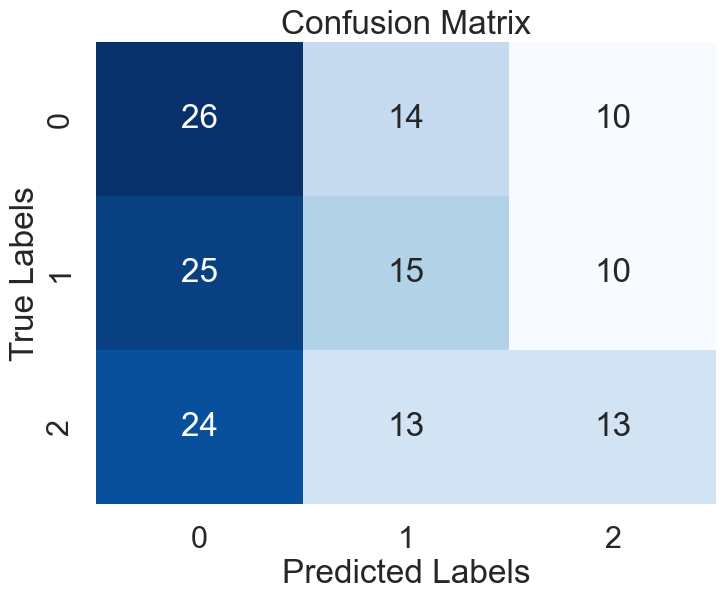

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Calculate total observations
total_obs = np.sum(conf_matrix)

# Calculate correctly predicted observations
correct_obs = np.sum(TP)

# Calculate accuracy
accuracy = correct_obs / total_obs

print("Accuracy:", accuracy)


#precision

# Calculate precision for each class
precision = TP / (TP + FP)

# Print precision for each class
print("Precision for each class:")
for i, prec in enumerate(precision):
    print(f"Class {i}: {prec}")
    

#recall

# Calculate recall for each class
recall = TP / (TP + FN)

# Print recall for each class
print("Recall for each class:")
for i, rec in enumerate(recall):
    print(f"Class {i}: {rec}")
    

#F1

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print F1-score for each class
print("F1-score for each class:")
for i, f1 in enumerate(f1_score):
    print(f"Class {i}: {f1}")

    




Accuracy: 0.36
Precision for each class:
Class 0: 0.3466666666666667
Class 1: 0.35714285714285715
Class 2: 0.3939393939393939
Recall for each class:
Class 0: 0.52
Class 1: 0.3
Class 2: 0.26
F1-score for each class:
Class 0: 0.41600000000000004
Class 1: 0.32608695652173914
Class 2: 0.3132530120481928


In [33]:
#AUC-ROC

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))

# Calculate AUC-ROC for each class
auc_roc = []
for i in range(true_labels_bin.shape[1]):
    auc_roc.append(roc_auc_score(true_labels_bin[:, i], predictions[:, i]))

# Average AUC-ROC across all classes
average_auc_roc = np.mean(auc_roc)

# Print AUC-ROC for each class and average AUC-ROC
print("AUC-ROC for each class:")
for i, auc in enumerate(auc_roc):
    print(f"Class {i}: {auc}")

print("Average AUC-ROC:", average_auc_roc)

AUC-ROC for each class:
Class 0: 0.5402
Class 1: 0.5334
Class 2: 0.5425
Average AUC-ROC: 0.5387


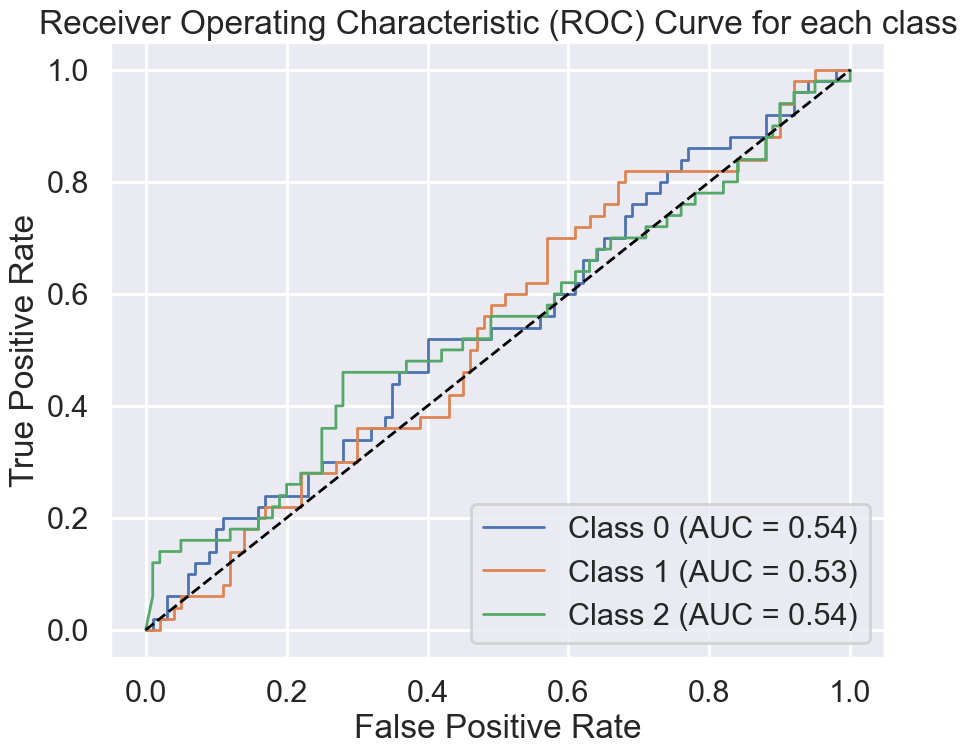

Average AUC-ROC: 0.5387


In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))

# Calculate AUC-ROC for each class
auc_roc = []
for i in range(true_labels_bin.shape[1]):
    auc_roc.append(roc_auc_score(true_labels_bin[:, i], predictions[:, i]))

# Plot AUC-ROC for each class
plt.figure(figsize=(10, 8))
for i in range(true_labels_bin.shape[1]):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {auc_roc[i]:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

# Average AUC-ROC across all classes
average_auc_roc = np.mean(auc_roc)
print("Average AUC-ROC:", average_auc_roc)

In [35]:
from sklearn.metrics import classification_report

# Make predictions on the test data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the test generator
y_true = validation_generator.classes

# Generate the classification report
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

5/5 [==============================] - 16s 3s/step
              precision    recall  f1-score   support

     Healthy       0.35      0.52      0.42        50
     Powdery       0.36      0.30      0.33        50
        Rust       0.33      0.22      0.27        50

    accuracy                           0.35       150
   macro avg       0.35      0.35      0.34       150
weighted avg       0.35      0.35      0.34       150



5/5 [==============================] - 17s 3s/step


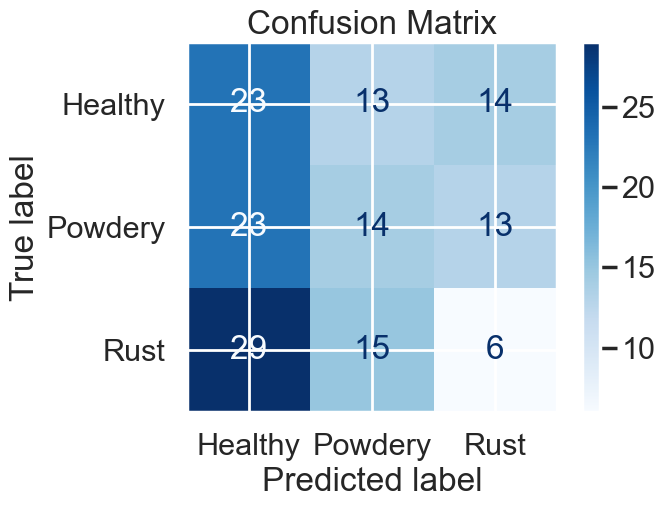

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the test generator
y_true = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(validation_generator.class_indices.keys()))

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

5/5 [==============================] - 17s 3s/step


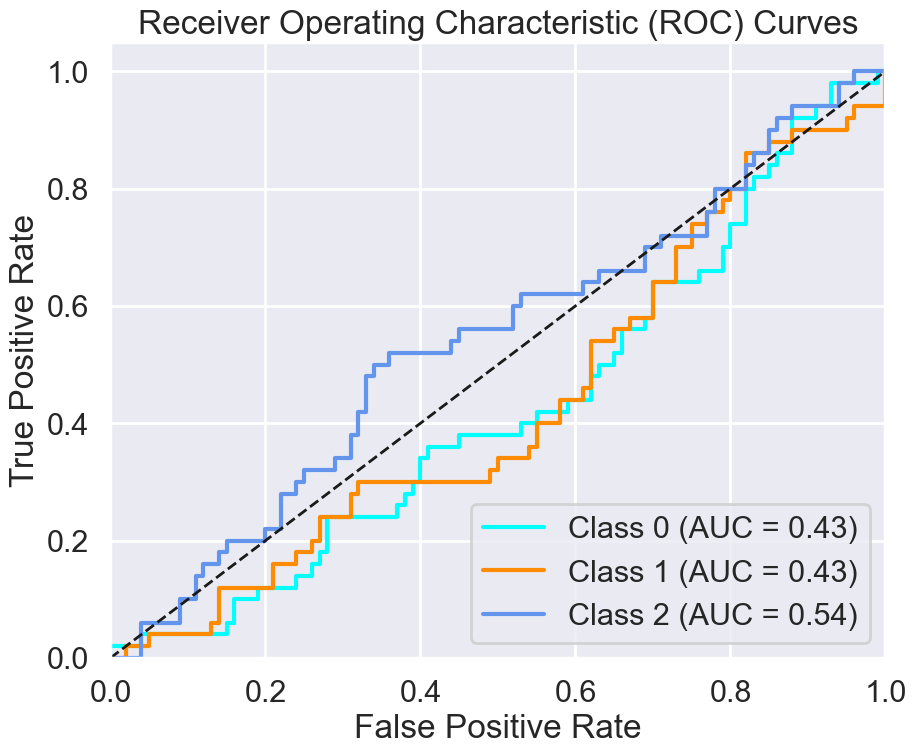

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Make predictions on the test data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the test generator
y_true = validation_generator.classes

# Binarize the output labels for multi-class ROC
n_classes = len(validation_generator.class_indices)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'Class {i}').plot(ax=plt.gca(), color=color)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()